## Retail Dataset

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the path of the data
path = r"C:\Users\pc\Downloads\dataset\work_stuff\retail_data_dirty.xlsx"

In [3]:
#importing the data based on their sheet
Sales_Transactions = pd.read_excel(path, sheet_name="Sales_Transactions")
Product_Info = pd.read_excel(path, sheet_name="Product_Info")
Store_Info = pd.read_excel(path, sheet_name="Store_Info")

In [4]:
#Sales Transaction Table
Sales_Transactions.head(5)

,Transaction_ID,Date,Customer_ID,Product_ID,Units_Sold,Sale_Amount,Store_Name
0,TXN000000,2023-11-03,CUST5695,177,9.0,NaN,Alpha
1,TXN000001,2023-03-30,CUST1035,107,6.0,91.44,Gamma
2,TXN000002,2023-08-27,CUST4216,190,8.0,785.16,Beta
3,TXN000003,2023-02-07,CUST8870,195,3.0,286.08,Alpha
4,TXN000004,2023-12-27,CUST4105,105,5.0,688.16,Alpha


In [5]:
#Product info table (first 5)
Product_Info.head(5)

,Product_ID,Product_Name,Category,Price,Discontinued
0,100,Monitor,Accessories,232.78,yes
1,101,Monitor,Office,1163.09,N
2,102,Printer,Office,202.45,N
3,103,Laptop,Electronics,375.07,Yes
4,104,Laptop,Office,1262.60,Yes


In [6]:
#store Info table (first 5)
Store_Info.head()

,Store_Name,Location,Manager,Open_Since,Annual_Revenue
0,Alpha INC,Houston,Manager_0,2015-09-14,3835885.30
1,Alpha Ltd,Houston,Manager_1,2017-10-15,5765173.09
2,Alpha Corp,Los Angeles,Manager_2,2011-04-17,5425306.21
3,Alpha,Chicago,Manager_3,2014-03-04,6084626.88
4,Beta INC,Los Angeles,Manager_4,2010-08-15,7222697.24


the unique identifier between Sales Transactions nad Product info  table is the product ID, 
while the the common table between Sales Transactions and Store Info is the store name column.
Hence it will be used to merge both tables

In [7]:
#Merging Sales transaction and product info tables
data_merged1 = pd.merge( Sales_Transactions, Product_Info, on='Product_ID', how='inner' )
data_merged1.head(6)

,Transaction_ID,Date,Customer_ID,Product_ID,Units_Sold,Sale_Amount,Store_Name,Product_Name,Category,Price,Discontinued
0,TXN000000,2023-11-03,CUST5695,177,9.0,NaN,Alpha,Laptop,Office,120.80,No
1,TXN000001,2023-03-30,CUST1035,107,6.0,91.44,Gamma,Phone,Electronics,984.84,No
2,TXN000002,2023-08-27,CUST4216,190,8.0,785.16,Beta,Printer,Office,140.11,yes
3,TXN000003,2023-02-07,CUST8870,195,3.0,286.08,Alpha,Tablet,Electronics,452.92,no
4,TXN000004,2023-12-27,CUST4105,105,5.0,688.16,Alpha,Laptop,Accessories,236.02,N
5,TXN000005,2023-03-20,CUST6193,135,7.0,NaN,Beta Ltd,Monitor,Accessories,846.23,No


In [8]:
#Merging Sales transaction and Store info tables
data_merged2 = pd.merge(data_merged1, Store_Info, on='Store_Name', how='inner')
data_merged2.head(10)

,Transaction_ID,Date,Customer_ID,Product_ID,Units_Sold,Sale_Amount,Store_Name,Product_Name,Category,Price,Discontinued,Location,Manager,Open_Since,Annual_Revenue
0,TXN000005,2023-03-20,CUST6193,135,7.0,NaN,Beta Ltd,Monitor,Accessories,846.23,No,Houston,Manager_5,2011-07-13,8284314.53
1,TXN000039,2023-07-02,CUST8104,119,7.0,627.78,Delta INC,Printer,Office,706.15,N,New York,Manager_12,2017-03-08,6844202.48
2,TXN000080,2023-09-13,NaN,129,9.0,730.42,Alpha INC,Monitor,Accessories,113.78,no,Houston,Manager_0,2015-09-14,3835885.30
3,TXN000093,2023-05-28,CUST5003,154,9.0,391.09,Beta Corp,Phone,Office,439.94,N,Los Angeles,Manager_6,2011-10-27,4824945.84
4,TXN000121,2023-01-12,CUST9254,144,3.0,NaN,Alpha Ltd,Printer,Accessories,902.08,Y,Houston,Manager_1,2017-10-15,5765173.09
5,TXN000162,2023-12-31,CUST2469,165,2.0,571.11,Alpha,Laptop,Office,1267.34,yes,Chicago,Manager_3,2014-03-04,6084626.88
6,TXN000193,2023-06-24,CUST2281,126,4.0,49.48,Alpha Corp,Monitor,Accessories,858.39,no,Los Angeles,Manager_2,2011-04-17,5425306.21
7,TXN000223,2023-03-15,CUST4420,135,2.0,835.07,Beta Ltd,Monitor,Accessories,846.23,No,Houston,Manager_5,2011-07-13,8284314.53
8,TXN000242,2023-01-26,CUST2062,143,5.0,547.94,Alpha,Monitor,Office,364.63,Y,Chicago,Manager_3,2014-03-04,6084626.88
9,TXN000248,2023-12-05,CUST8419,157,9.0,127.00,Gamma Corp,Printer,Accessories,734.13,Y,New York,Manager_10,2015-11-19,4393285.48


In [9]:
#Information about the data and their datatypes
data_merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3944 entries, 0 to 3943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  3944 non-null   object        
 1   Date            3944 non-null   datetime64[ns]
 2   Customer_ID     3746 non-null   object        
 3   Product_ID      3944 non-null   int64         
 4   Units_Sold      3725 non-null   float64       
 5   Sale_Amount     3740 non-null   float64       
 6   Store_Name      3944 non-null   object        
 7   Product_Name    3944 non-null   object        
 8   Category        3944 non-null   object        
 9   Price           3944 non-null   float64       
 10  Discontinued    3944 non-null   object        
 11  Location        3944 non-null   object        
 12  Manager         3944 non-null   object        
 13  Open_Since      3944 non-null   datetime64[ns]
 14  Annual_Revenue  3944 non-null   float64       
dtypes: d

In [10]:
#Inspecting for columns with null values
data_merged2.isnull().sum()

Transaction_ID      0
Date                0
Customer_ID       198
Product_ID          0
Units_Sold        219
Sale_Amount       204
Store_Name          0
Product_Name        0
Category            0
Price               0
Discontinued        0
Location            0
Manager             0
Open_Since          0
Annual_Revenue      0
dtype: int64

Sales amount column has 204 null cells, Customer_ID column has 198 null cells, unit sold column has 219 null cells.
we will remove  all the null values since they cannot be accounted for.

In [11]:
# Remove rows with null values in 'Customer_ID', 'Units_Sold and Sales_Amount columns respectively
data_merged2 = data_merged2.dropna(subset=['Customer_ID','Units_Sold','Sale_Amount'])

In [12]:
data_merged2.isna().sum()

Transaction_ID    0
Date              0
Customer_ID       0
Product_ID        0
Units_Sold        0
Sale_Amount       0
Store_Name        0
Product_Name      0
Category          0
Price             0
Discontinued      0
Location          0
Manager           0
Open_Since        0
Annual_Revenue    0
dtype: int64

In [13]:
data_merged2["Location"].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston'], dtype=object)

In [14]:
data_merged2["Discontinued"].unique()

array(['N', 'yes', 'no', 'No', 'Y', 'Yes'], dtype=object)

In [15]:
#to have a consistent response for the discontinued column via using capitalize
data_merged2["Discontinued"] = data_merged2["Discontinued"].str.capitalize()
data_merged2["Discontinued"].unique()

array(['N', 'Yes', 'No', 'Y'], dtype=object)

In [16]:
#to have a unique value yes/no for the discontinued colum we use the replace () function
data_merged2["Discontinued"]= data_merged2["Discontinued"].replace({"N":"No", "Y":"Yes"})
data_merged2["Discontinued"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
data_merged2.describe()

,Date,Product_ID,Units_Sold,Sale_Amount,Price,Open_Since,Annual_Revenue
count,3357,3357.000000,3357.000000,3357.000000,3357.000000,3357,3.357000e+03
mean,2023-06-30 13:44:27.024128512,150.161156,5.529937,505.002872,748.118371,2014-12-15 04:38:23.485254656,5.471341e+06
min,2023-01-01 00:00:00,100.000000,1.000000,10.180000,109.070000,2010-08-15 00:00:00,1.235296e+06
25%,2023-03-31 00:00:00,125.000000,3.000000,261.610000,364.630000,2011-10-27 00:00:00,4.393285e+06
50%,2023-06-30 00:00:00,151.000000,6.000000,507.530000,751.800000,2015-07-06 00:00:00,5.583633e+06
75%,2023-10-02 00:00:00,175.000000,8.000000,753.370000,1017.540000,2017-03-08 00:00:00,6.844202e+06
max,2023-12-31 00:00:00,199.000000,10.000000,999.760000,1490.260000,2020-06-26 00:00:00,9.778916e+06
std,NaN,29.002003,2.857994,284.450302,395.026937,NaN,2.244280e+06


## 3.	What are the total sales per product category?

In [18]:
#3.	What are the total sales per product category?
total_sale_cat = data_merged2.groupby(["Category"])["Sale_Amount"].sum()
total_sale_cat

Category
Accessories    409024.13
Electronics    639724.52
Office         646545.99
Name: Sale_Amount, dtype: float64

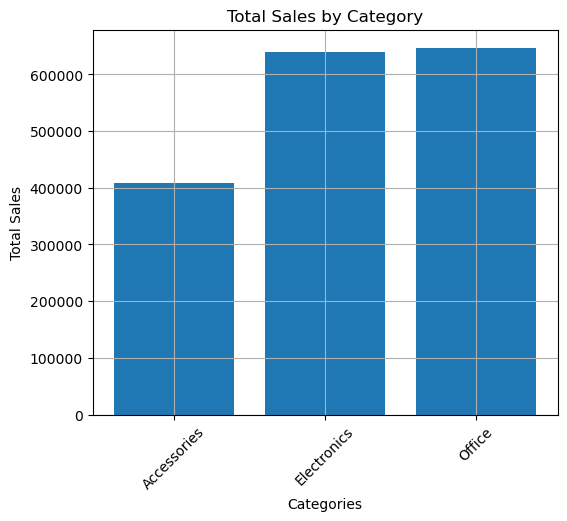

In [35]:
#Vizualisation
plt.figure(figsize=(6, 5))
plt.grid(True)
plt.bar(total_sale_cat.index, total_sale_cat.values)  # Use .values for data

plt.xlabel('Categories')  # Optional: Add x-axis label
plt.ylabel('Total Sales')  # Optional: Add y-axis label
plt.title('Total Sales by Category')  # Optional: Add title
plt.xticks(rotation=45) # Optional: Rotate x-axis labels for better visibility
plt.show()


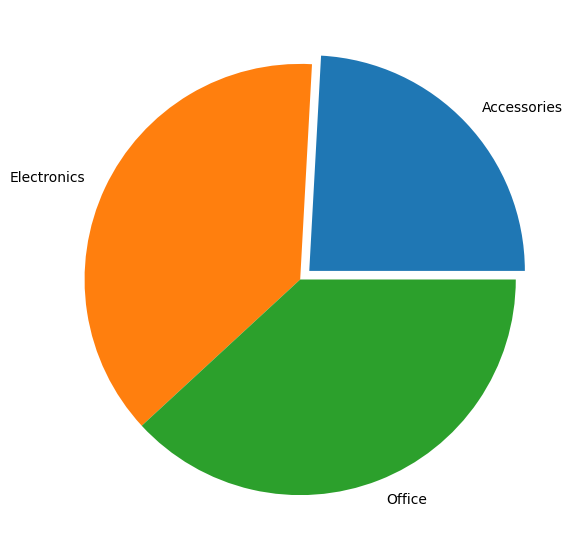

In [45]:
plt.figure(figsize=(8,7))
x =total_sale_cat.values
labels = labels
plt.pie(x,labels=labels, explode=[0.058, 0,0])
plt.show()

In [46]:
# 4.	Which stores had the highest and lowest revenue in 2023?
store_sales= data_merged2.groupby(["Store_Name"])["Sale_Amount"].sum().sort_values()
store_sales

Store_Name
Alpha Corp     91362.14
Beta INC       92517.47
Gamma Ltd      94387.85
Gamma Corp     98980.75
Delta Corp    102604.47
Beta Ltd      104016.59
Gamma         104108.28
Beta          106078.92
Gamma INC     106104.71
Delta Ltd     106390.67
Alpha INC     107022.24
Alpha Ltd     111791.84
Alpha         112745.26
Delta         114031.24
Beta Corp     120246.68
Delta INC     122905.53
Name: Sale_Amount, dtype: float64

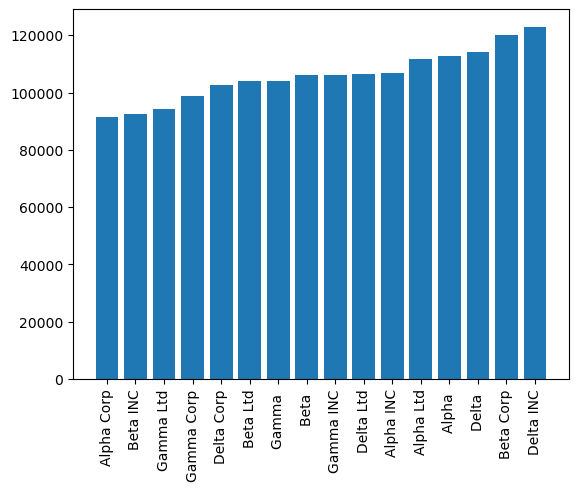

In [49]:
x = store_sales.index
y = store_sales.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


In [22]:
hi_low_rev = data_merged2.groupby(["Store_Name"])["Sale_Amount"].sum().sort_values()
hi_low_rev

Store_Name
Alpha Corp     91362.14
Beta INC       92517.47
Gamma Ltd      94387.85
Gamma Corp     98980.75
Delta Corp    102604.47
Beta Ltd      104016.59
Gamma         104108.28
Beta          106078.92
Gamma INC     106104.71
Delta Ltd     106390.67
Alpha INC     107022.24
Alpha Ltd     111791.84
Alpha         112745.26
Delta         114031.24
Beta Corp     120246.68
Delta INC     122905.53
Name: Sale_Amount, dtype: float64

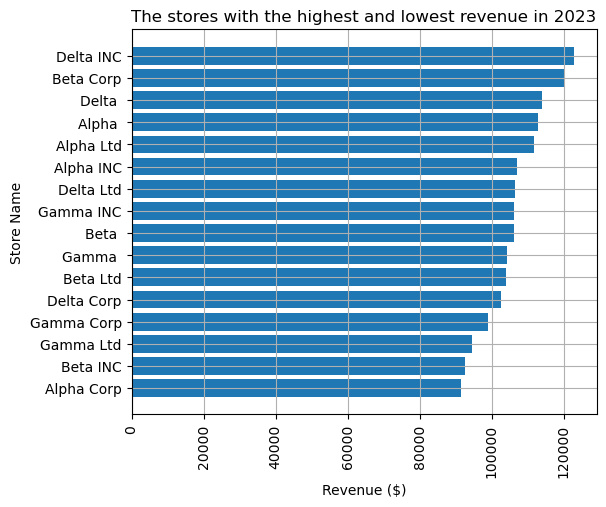

In [23]:
#visualisation
plt.figure(figsize=(6, 5))
plt.grid(True)
plt.barh(hi_low_rev.index, hi_low_rev.values)
plt.title("The stores with the highest and lowest revenue in 2023")
plt.xlabel('Revenue ($)')  
plt.ylabel('Store Name')
plt.xticks(rotation=90)
plt.show()

the store with the lowest sale is the Alpha Corp (with revenue of  91362.14USD),

while the store with the highest sale is the Delta INC (with a revenue of  122905.53USD)

In [24]:
#5.	What is the monthly sales trend across all stores?
monthly_sales =data_merged2.groupby(data_merged2["Date"].dt.to_period("M"))["Sale_Amount"].sum().sort_index()
monthly_sales

Date
2023-01    145925.65
2023-02    128194.53
2023-03    144380.16
2023-04    146892.11
2023-05    138168.94
2023-06    125933.84
2023-07    150634.58
2023-08    138065.48
2023-09    126114.23
2023-10    152227.24
2023-11    154192.22
2023-12    144565.66
Freq: M, Name: Sale_Amount, dtype: float64

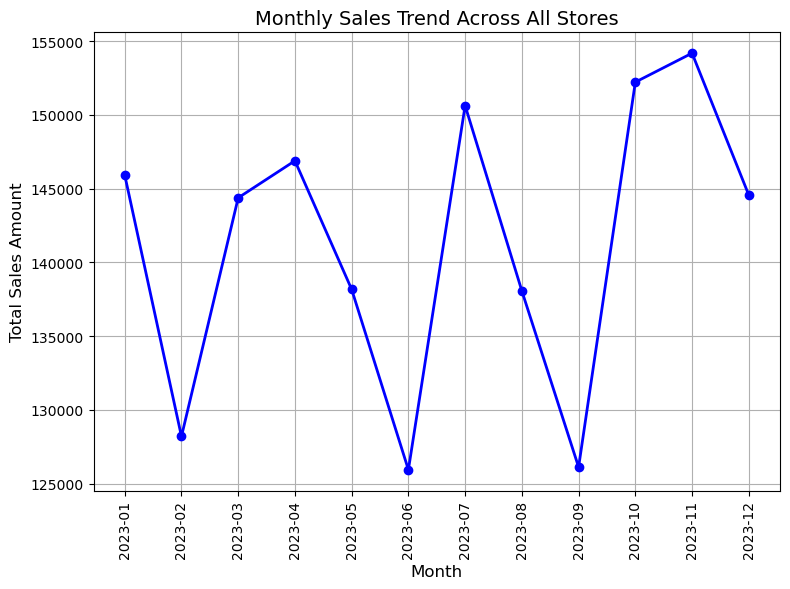

In [52]:
plt.figure(figsize=(8, 6))  # Adjusted for better readability
plt.grid(True)  
plt.plot(monthly_sales.index.astype(str), monthly_sales.values,marker='o',  color='blue', linewidth=2)  # Added markers & styling
plt.title("Monthly Sales Trend Across All Stores", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [26]:
print(f'the month with the highest sales: {monthly_sales.idxmax()}')
print(f'the month with the lowest sales: {monthly_sales.idxmin()}')

the month with the highest sales: 2023-11
the month with the lowest sales: 2023-06


## 6.Which products are top-selling by unit volume and revenue?

In [27]:
# 6.Which products are top-selling by unit volume and revenue?
prod_sold = data_merged2.groupby(['Units_Sold','Product_Name'])['Sale_Amount'].sum()
prod_sold

Units_Sold  Product_Name
1.0         Laptop          30331.98
            Monitor         28233.14
            Phone           28152.42
            Printer         46144.63
            Tablet          32366.98
2.0         Laptop          36484.81
            Monitor         38684.20
            Phone           15549.72
            Printer         38159.01
            Tablet          38001.39
3.0         Laptop          45839.73
            Monitor         35187.36
            Phone           18097.23
            Printer         40016.48
            Tablet          30132.22
4.0         Laptop          25386.29
            Monitor         44170.30
            Phone           18350.91
            Printer         46887.58
            Tablet          42280.98
5.0         Laptop          52765.56
            Monitor         40184.98
            Phone           13129.77
            Printer         38523.19
            Tablet          33156.88
6.0         Laptop          49275.79
            M

In [28]:
top_sale={}
for product in data_merged2["Product_Name"].unique():
    product_df= data_merged2[data_merged2["Product_Name"]==product]
    sum_sales= data_merged2.groupby("Date")["Sale_Amount"].sum()
    top_sale.update({product:sum_sales})

In [29]:
top_sale

{'Printer': Date
 2023-01-01    3256.41
 2023-01-02    4021.98
 2023-01-03    9702.72
 2023-01-04    6069.85
 2023-01-05    5316.00
                ...   
 2023-12-27    6632.87
 2023-12-28    6186.48
 2023-12-29    3954.88
 2023-12-30    3655.59
 2023-12-31    7046.55
 Name: Sale_Amount, Length: 365, dtype: float64,
 'Phone': Date
 2023-01-01    3256.41
 2023-01-02    4021.98
 2023-01-03    9702.72
 2023-01-04    6069.85
 2023-01-05    5316.00
                ...   
 2023-12-27    6632.87
 2023-12-28    6186.48
 2023-12-29    3954.88
 2023-12-30    3655.59
 2023-12-31    7046.55
 Name: Sale_Amount, Length: 365, dtype: float64,
 'Laptop': Date
 2023-01-01    3256.41
 2023-01-02    4021.98
 2023-01-03    9702.72
 2023-01-04    6069.85
 2023-01-05    5316.00
                ...   
 2023-12-27    6632.87
 2023-12-28    6186.48
 2023-12-29    3954.88
 2023-12-30    3655.59
 2023-12-31    7046.55
 Name: Sale_Amount, Length: 365, dtype: float64,
 'Monitor': Date
 2023-01-01    3256.41
 2023-

In [30]:
top_sale['Laptop']

Date
2023-01-01    3256.41
2023-01-02    4021.98
2023-01-03    9702.72
2023-01-04    6069.85
2023-01-05    5316.00
               ...   
2023-12-27    6632.87
2023-12-28    6186.48
2023-12-29    3954.88
2023-12-30    3655.59
2023-12-31    7046.55
Name: Sale_Amount, Length: 365, dtype: float64